# 3. Model Benchmarking - California Housing

**Goal:** Compare multiple algorithms with cross-validation to find the best base model.

**Algorithms Tested:**
- Linear Regression (Baseline)
- Ridge Regression (L2 Regularization)
- Lasso Regression (L1 Regularization)
- Random Forest
- XGBoost
- Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Housing data
housing = fetch_california_housing()
X, y = housing.data, housing.target

## 1. Defining Candidate Models

We wrap linear models in Pipelines with `StandardScaler` to ensure features are on the same scale.

In [3]:
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge (L2)': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso (L1)': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

## 2. Cross-Validation (5-Fold)

We use **RMSE (Root Mean Squared Error)** as our primary evaluation metric.

In [4]:
results = []
names = []

print("Running Cross-Validation Benchmarking...")
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    # Standardize to positive RMSE
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    results.append(-scores)
    names.append(name)
    print(f"{name:20}: Average RMSE = {-scores.mean():.4f} (+/- {scores.std():.4f})")

Running Cross-Validation Benchmarking...
Linear Regression   : Average RMSE = 0.7283 (+/- 0.0149)
Ridge (L2)          : Average RMSE = 0.7282 (+/- 0.0149)


Lasso (L1)          : Average RMSE = 1.1539 (+/- 0.0103)


Random Forest       : Average RMSE = 0.5034 (+/- 0.0088)


XGBoost             : Average RMSE = 0.4689 (+/- 0.0104)


Gradient Boosting   : Average RMSE = 0.5315 (+/- 0.0136)


## 3. Comparative Visualization

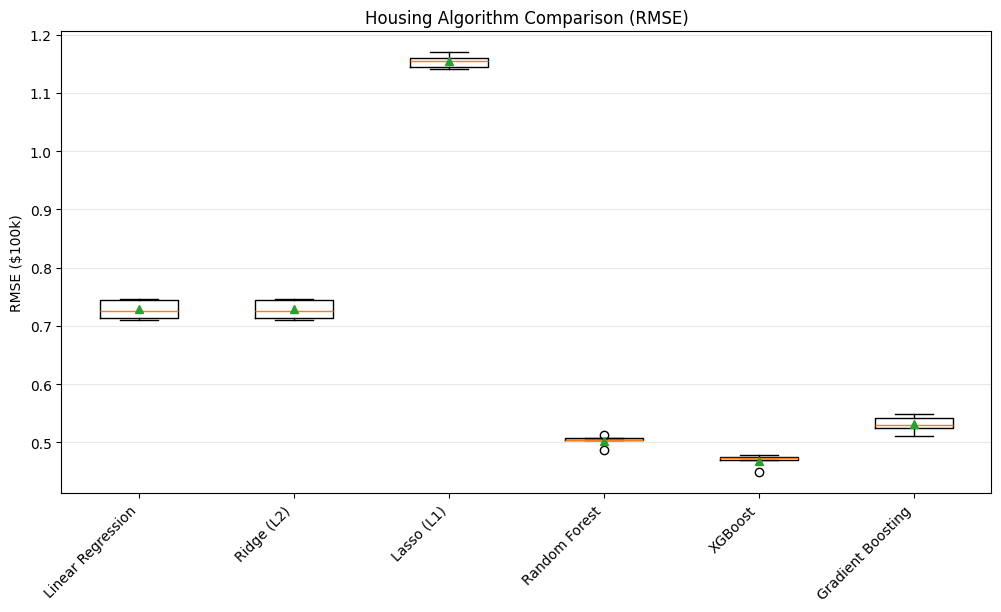

In [5]:
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Housing Algorithm Comparison (RMSE)")
plt.ylabel("RMSE ($100k)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## Final Conclusion

Boosting algorithms (**XGBoost** and **Gradient Boosting**) significantly outperform linear models and even standard Random Forests on this dataset.